In [1]:
import pandas as pd

data = [
    ("#214982","W","W","W","W","W","W"),
    ("#215030","S","S","C","S","C","S"),
    ("#229383","C","C","C","?","?","?"),
    ("#232660","W","W","C","W","W","?"),
    ("#235623","C","W","C","C","C","?"),
    ("#241535","C","C","C","C","C","?"),
    ("#254681","W","W","W","W","W","W"),
    ("#254683","W","W","W","W","W","W"),
    ("#254684","W","W","W","W","W","W"),
    ("#254691","W","W","W","W","W","W"),
    ("#254694","W","W","W","W","W","W"),
    ("#259833","C","W","C","C","W","C"),
    ("#254971","S","S","S","S","M","M"),
    ("#267013","C","C","C","C","C","S"),
    ("#267349","S","C","M","S","C","M"),
    ("#277142","S","S","C","S","C","M"),
    ("#294322","M","C","S","M","C","M"),
    ("#277401","C","C","C","C","C","C"),
    ("#292812","S","S","S","S","M","M"),
    ("#297249","C","C","E(C)","W","?","?"),
    ("#301062+","C","C","C","C","S","?"),
    ("#324127","W","W","W","W","W","W"),
    ("#330673","W","W","W","C","W","W"),
]

df = pd.DataFrame(data, columns=[
    "Issue","Overall","@theoretick","@rossfuhrman","@zrice","@vbhat161","@jamesliu-gitlab"
])


/tmp/ipython-input-1947008600.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(mu, x)
/tmp/ipython-input-1947008600.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c = np.trapz(x * mu, x) / area


COA(W) = 0.1400
COA(C) = 0.4000
COA(S) = 0.6000
COA(M) = 0.8600


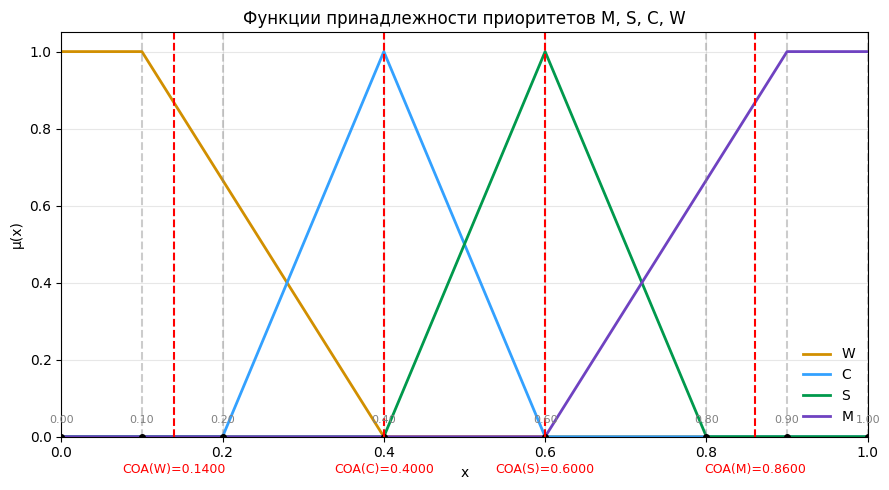

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pwl(points, xgrid):
    pts = np.array(points, dtype=float)
    xs, ys = pts[:, 0], pts[:, 1]
    return np.interp(xgrid, xs, ys)

def coa(x, mu):
    area = np.trapz(mu, x)
    if area == 0:
        return np.nan, 0.0
    c = np.trapz(x * mu, x) / area
    return c, area

x = np.linspace(0, 1, 1001)

W_pts = [(0.0, 1.0), (0.1, 1.0), (0.4, 0.0)]
C_pts = [(0.2, 0.0), (0.4, 1.0), (0.6, 0.0)]
S_pts = [(0.4, 0.0), (0.6, 1.0), (0.8, 0.0)]
M_pts = [(0.6, 0.0), (0.9, 1.0), (1.0, 1.0)]

W = pwl(W_pts, x)
C = pwl(C_pts, x)
S = pwl(S_pts, x)
M = pwl(M_pts, x)

colors = {
    "W": "#d18f00",
    "C": "#33a1ff",
    "S": "#00994c",
    "M": "#6f42c1",
}

COA_vals = {}
for name, mu in zip(["W", "C", "S", "M"], [W, C, S, M]):
    c, area = coa(x, mu)
    COA_vals[name] = c
    print(f"COA({name}) = {c:.4f}")

x_points = sorted(set([p[0] for p in W_pts + C_pts + S_pts + M_pts]))

plt.figure(figsize=(9, 5))
for name, mu in zip(["W", "C", "S", "M"], [W, C, S, M]):
    plt.plot(x, mu, label=name, color=colors[name], linewidth=2)

for x0 in x_points:
    plt.axvline(x=x0, color="gray", linestyle="--", alpha=0.4)
    plt.plot(x0, 0, 'ko', markersize=4)
    plt.text(x0, 0.03, f"{x0:.2f}", ha="center", va="bottom", fontsize=8, color="gray")

for name, xv in COA_vals.items():
    plt.axvline(x=xv, color="red", linestyle="--", linewidth=1.5)
    plt.text(xv, -0.08, f"COA({name})={xv:.4f}", color="red",
             ha="center", va="center", fontsize=9, transform=plt.gca().get_xaxis_transform())

plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.title("Функции принадлежности приоритетов M, S, C, W")
plt.grid(True, alpha=0.3)
plt.legend(loc="lower right", frameon=False)
plt.tight_layout()

plt.show()


In [3]:
# Лингвистические модификаторы
LINGUISTIC_MODIFIERS = {
    # Concentrators
    "very": 2.0,           # Very F => F^2
    "plus": 1.25,          # Plus F => F^1.25
    "extremely": 3.0,      # Extremely F => F^3
    "very_very": 4.0,      # Very very F => F^4
    # Dilators
    "more_or_less": 0.5,   # More-or-less F => F^(1/2)
    "minus": 0.75,         # Minus F => F^0.75
    "somewhat": 1.0/3.0    # Somewhat F => F^(1/3)
}

def apply_modifier(value, name):
    return float(value ** LINGUISTIC_MODIFIERS[name])

/tmp/ipython-input-1947008600.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(mu, x)
/tmp/ipython-input-1947008600.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c = np.trapz(x * mu, x) / area


\begin{table}[H]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{|c|c|c|c|c|c|c|c|c|}\hline
\textbf{Issue} & \textbf{Old result} & \textbf{Result} & \textbf{COA} & \textbf{@theoretick} & \textbf{@rossfuhrman} & \textbf{@zrice} & \textbf{@vbhat161} & \textbf{@jamesliu-gitlab} \\ \hline
\#294322 & M & S & 0.6745 & Plus C & Somewhat S & Somewhat M & C & M \\ \hline
\#254971 & S & S & 0.6551 & Plus S & S & Very S & More-or-less M & M \\ \hline
\#292812 & S & S & 0.6448 & More-or-less S & S & Very very S & M & M \\ \hline
\#277142 & S & S & 0.5655 & More-or-less S & C & Very S & C & Minus M \\ \hline
\#267013 & C & C & 0.5536 & More-or-less C & C & Minus C & More-or-less C & S \\ \hline
\#267349 & S & S & 0.5057 & C & Extremely M & Very very S & Minus C & M \\ \hline
\#301062+ & C & C & 0.4948 & C & C & C & Minus S & Minus C or Minus S \\ \hline
\#215030 & S & S & 0.4757 & Very very S & Very C & More-or-less S & More-or-less C & Minus S \\ \hline
\#297249 & C & C & 0.4661 & Plus C & 

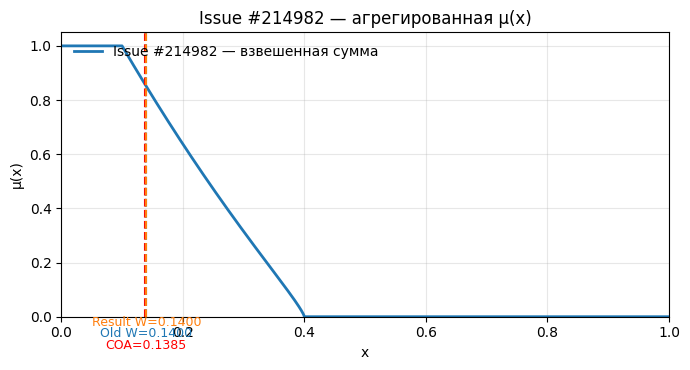

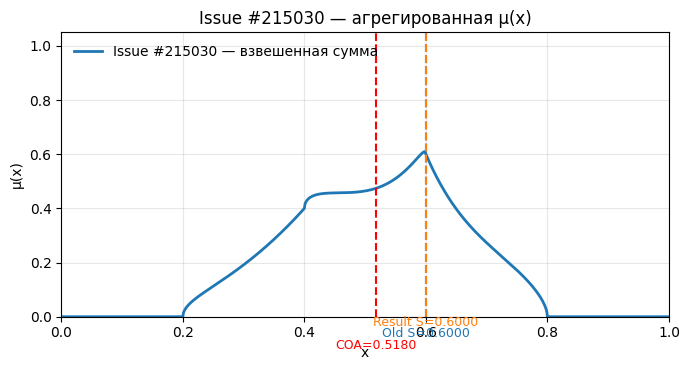

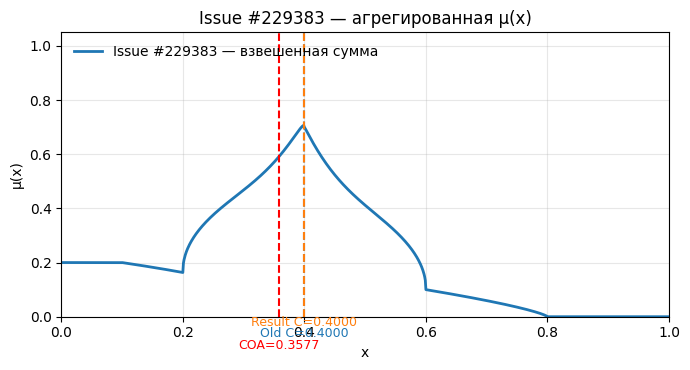

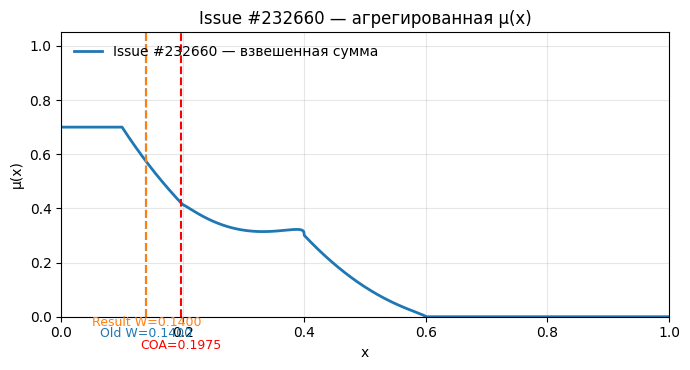

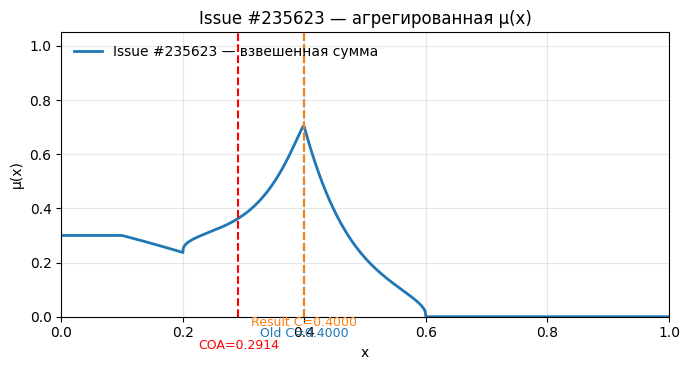

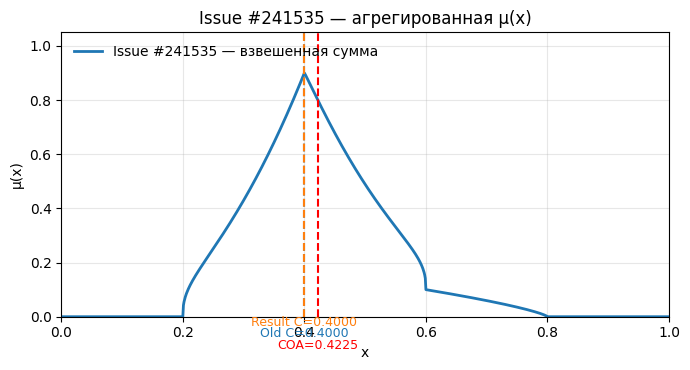

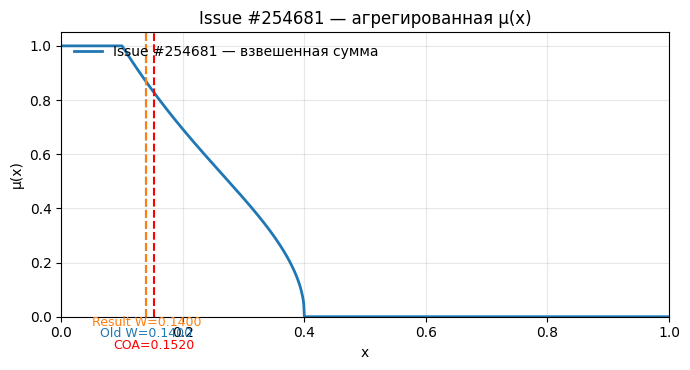

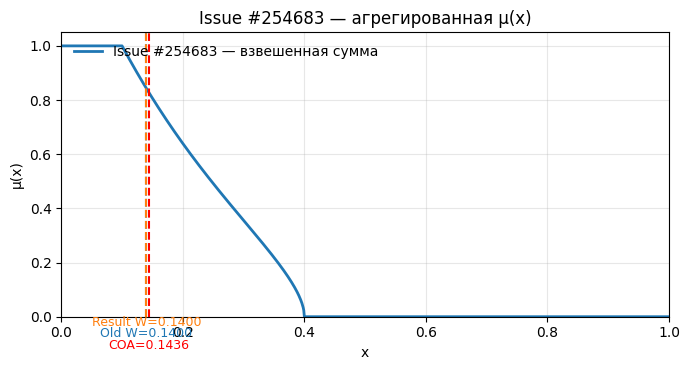

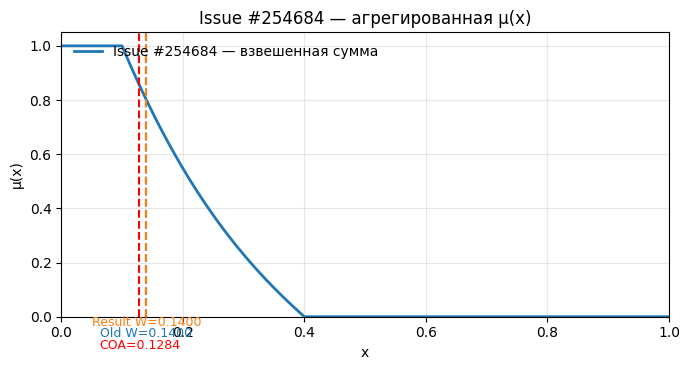

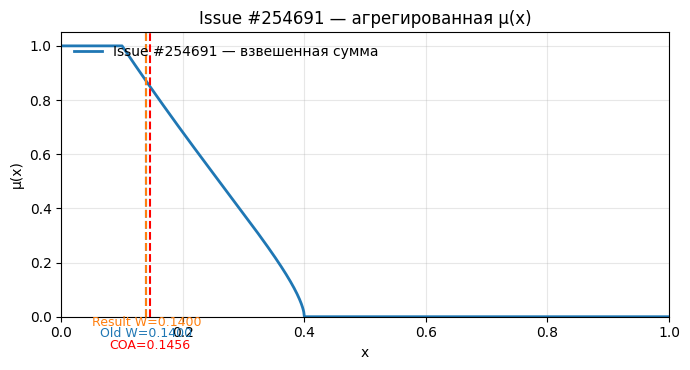

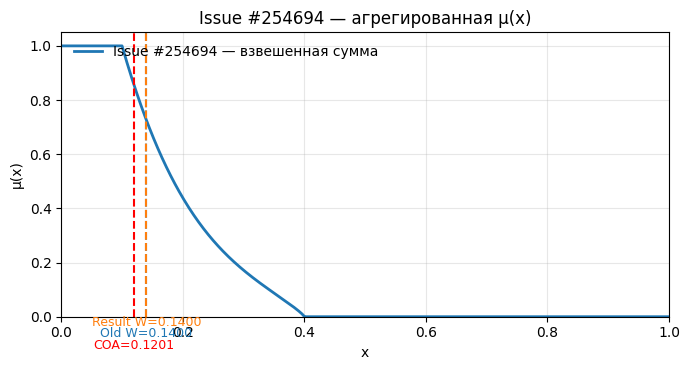

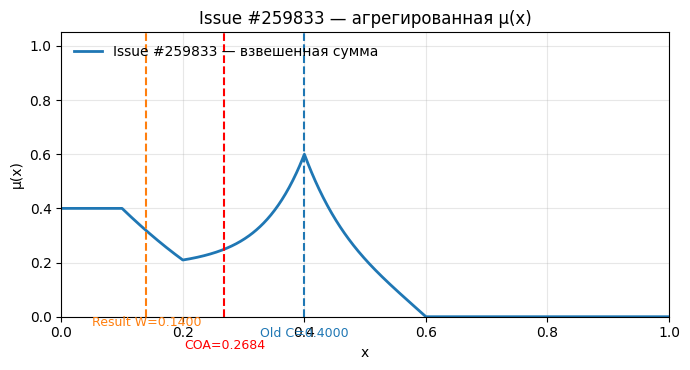

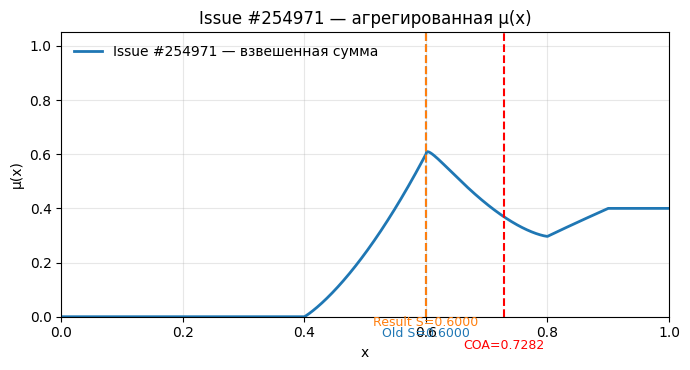

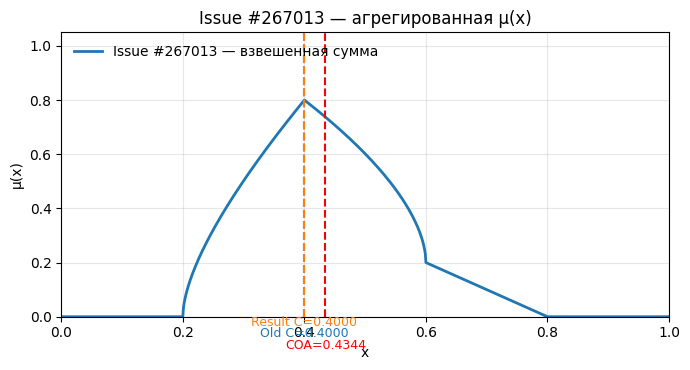

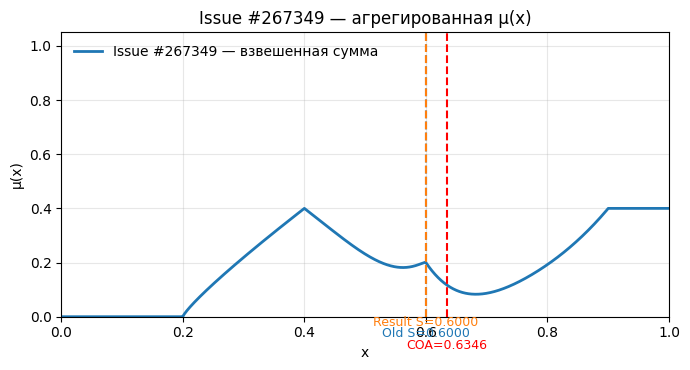

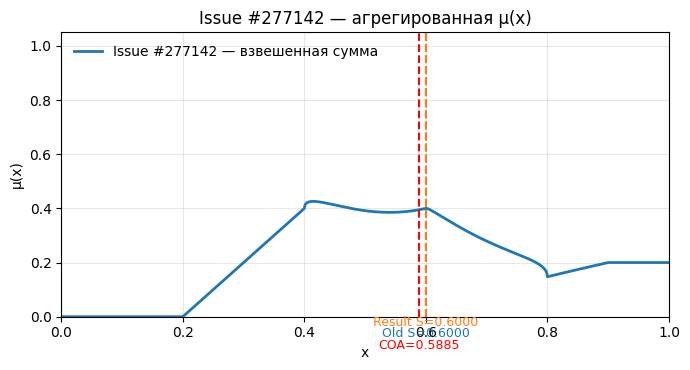

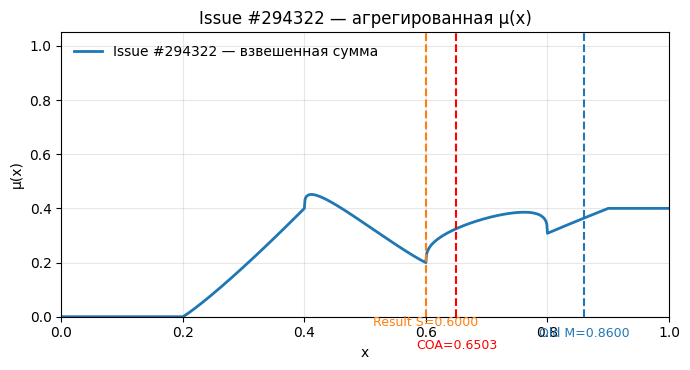

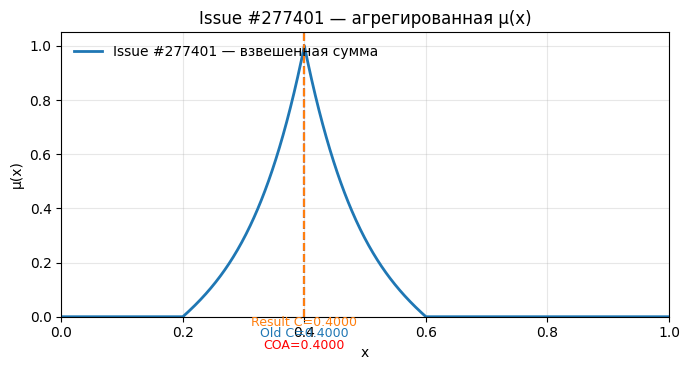

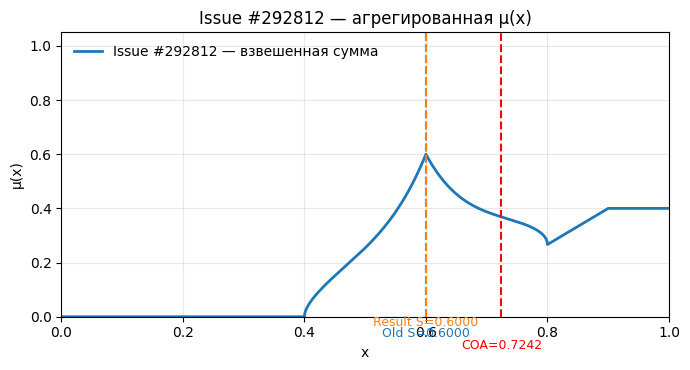

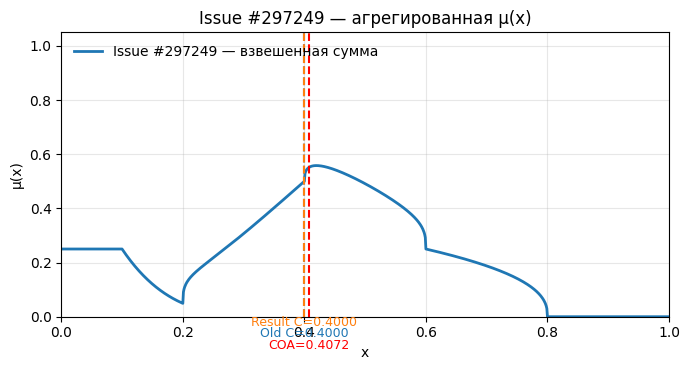

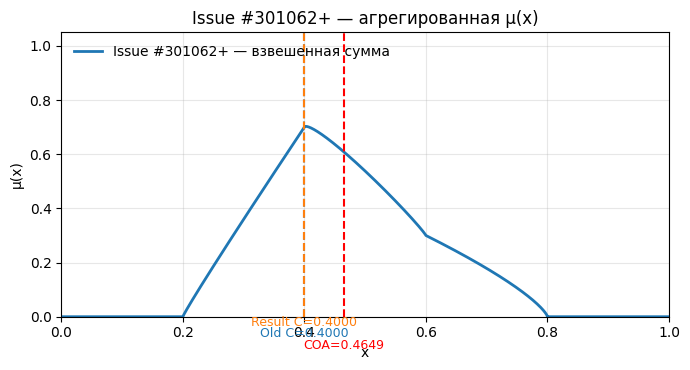

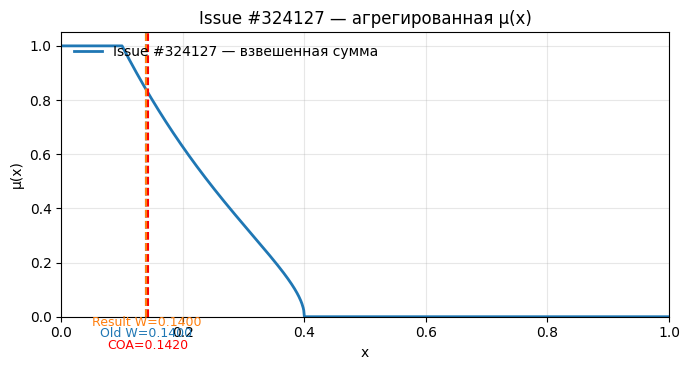

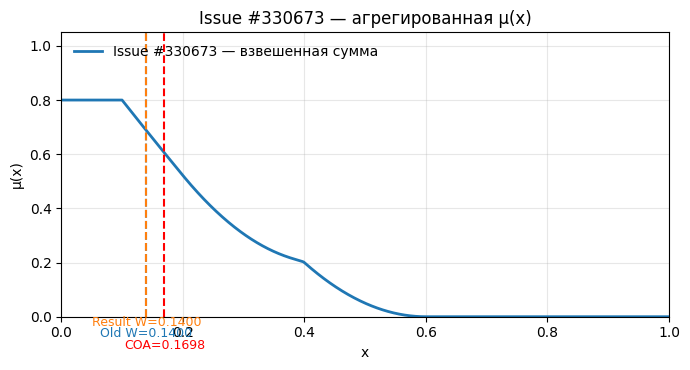

In [4]:
# Синтез новой таблицы
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

COA_centers = {"W": 0.14, "C": 0.4, "S": 0.6, "M": 0.86}

hedges = LINGUISTIC_MODIFIERS
hedge_names = list(hedges.keys())
hedge_label = {
    "very": "Very", "plus": "Plus", "extremely": "Extremely", "very_very": "Very very",
    "more_or_less": "More-or-less", "minus": "Minus", "somewhat": "Somewhat"
}

random.seed(42)
np.random.seed(42)

cats = ["W","C","S","M"]

neighbor = {"W":["C"], "C":["W","S"], "S":["C","M"], "M":["S"]}
MU_BY_CAT = {"W": W, "C": C, "S": S, "M": M}

def apply_hedge(value, name):
    return float(value ** hedges[name])

def sample_optional_hedge(p=0.75):
    return random.choice(hedge_names) if random.random() < p else None

def desc(cat, hedge):
    return cat if hedge is None else f"{hedge_label[hedge]} {cat}"

def val(cat, hedge):
    base = COA_centers[cat]
    return apply_hedge(base, hedge) if hedge else base

def annotate_coa(ax, c, color="red", y_text=-0.08):
    ax.axvline(c, linestyle="--", color=color, linewidth=1.5)
    ax.text(c, y_text, f"COA={c:.4f}", color=color,
            ha="center", va="center", fontsize=9, transform=ax.get_xaxis_transform())

def nearest_center_from_value(v):
    return min(COA_centers, key=lambda k: abs(COA_centers[k] - v))

DILATORS = ["more_or_less", "minus", "somewhat"]

def decide_parts(cell, overall_cat):
    cell = str(cell).strip()
    if cell.startswith("E"):
        return []
    if cell == "?":
        h1, h2 = random.choice(DILATORS), random.choice(DILATORS)
        nb = random.choice(neighbor[overall_cat])
        return [(overall_cat, h1, 0.5), (nb, h2, 0.5)]
    h = sample_optional_hedge(0.75)
    return [(cell, h, 1.0)]

def render_text(cat, hedge):
    return desc(cat, hedge)

def prepare_all(df):
    stakeholders = ["@theoretick","@rossfuhrman","@zrice","@vbhat161","@jamesliu-gitlab"]
    prepared_rows, prepared_mu = [], []

    for _, r in df.iterrows():
        issue = r["Issue"]
        overall_cat = r["Overall"]

        by_person, rendered_cols, valid = [], [], 0
        for st in stakeholders:
            parts_local = decide_parts(r[st], overall_cat)
            by_person.append(parts_local)
            if parts_local:
                valid += 1
                rendered_cols.append(" or ".join(render_text(cat, hedge) for (cat, hedge, _) in parts_local))
            else:
                rendered_cols.append("Elsewhere")

        if valid == 0:
            prepared_rows.append({
                "Issue": issue, "Old result": overall_cat, "Result": "NA", "COA": float("nan"),
                "@theoretick'": "", "@rossfuhrman'": "", "@zrice'": "", "@vbhat161'": "", "@jamesliu-gitlab'": "",
            })
            continue

        w_person = 1.0 / valid
        terms, mu_parts = [], []
        for parts_local in by_person:
            if not parts_local: continue
            total_local = sum(w for _,_,w in parts_local)
            for cat, hedge, w_local in parts_local:
                w_global = (w_local / total_local) * w_person
                terms.append((w_global, val(cat, hedge)))
                mu_parts.append((w_global, cat, hedge))

        score_sum = sum(w*v for w,v in terms)

        # агрегированная μ и её COA
        agg = np.zeros_like(x, dtype=float)
        for w_global, cat, hedge_name in mu_parts:
            mu_base = MU_BY_CAT[cat]
            mu_mod = np.power(mu_base, hedges[hedge_name]) if hedge_name else mu_base
            agg += w_global * mu_mod
        agg = np.clip(agg, 0.0, 1.0)
        c_val, _ = coa(x, agg)

        nearest = nearest_center_from_value(c_val)

        prepared_rows.append({
            "Issue": issue, "Old result": overall_cat, "Result": nearest,
            "COA": round(score_sum,4),
            "@theoretick'": rendered_cols[0], "@rossfuhrman'": rendered_cols[1],
            "@zrice'": rendered_cols[2], "@vbhat161'": rendered_cols[3],
            "@jamesliu-gitlab'": rendered_cols[4],
        })

        prepared_mu.append({"Issue": issue, "Overall": overall_cat, "Result": nearest,
                            "COA": c_val, "parts": mu_parts})
    return prepared_rows, prepared_mu

prepared_rows, prepared_mu = prepare_all(df)
df_new = pd.DataFrame(prepared_rows).sort_values(by="COA", ascending=False).reset_index(drop=True)

# LaTeX экспорт
def latex_escape_cell(s):
    s = str(s)
    s = (s.replace('\\', r'\textbackslash{}')
           .replace('&', r'\&')
           .replace('%', r'\%')
           .replace('_', r'\_')
           .replace('#', r'\#'))
    return s

cols = ["Issue","Old result","Result","COA",
        "@theoretick'","@rossfuhrman'","@zrice'","@vbhat161'","@jamesliu-gitlab'"]

header_inner = (
    r"\textbf{Issue} & \textbf{Old result} & \textbf{Result} & \textbf{COA} & "
    r"\textbf{@theoretick} & \textbf{@rossfuhrman} & \textbf{@zrice} & "
    r"\textbf{@vbhat161} & \textbf{@jamesliu-gitlab}"
)
table_spec = "|c|c|c|c|c|c|c|c|c|"
lines = [" & ".join(latex_escape_cell(row[c]) for c in cols) + r" \\ \hline"
         for _, row in df_new.iterrows()]
latex_tabular = (
    r"\begin{tabular}{" + table_spec + r"}\hline" + "\n" +
    header_inner + r" \\ \hline" + "\n" +
    "\n".join(lines) + "\n" +
    r"\end{tabular}"
)
latex_table = (
    r"\begin{table}[H]" "\n"
    r"\centering" "\n"
    r"\resizebox{\textwidth}{!}{%" "\n" +
    latex_tabular + "\n" +
    r"}" "\n"
    r"\caption{Итоговая таблица дефаззификации}" "\n"
    r"\end{table}"
)
print(latex_table)

# Графики
issue_to_result = dict(zip(df_new["Issue"], df_new["Result"]))

def apply_hedge_mu(mu, hedge_name):
    if hedge_name is None: return mu
    return np.power(mu, hedges[hedge_name])

def build_aggregated_mu_from_prepared(mu_parts):
    agg = np.zeros_like(x, dtype=float)
    for w_global, cat, hedge_name in mu_parts:
        mu_base = MU_BY_CAT[cat]
        mu_mod = apply_hedge_mu(mu_base, hedge_name)
        agg += w_global * mu_mod
    return np.clip(agg, 0.0, 1.0)

for item in prepared_mu:
    issue = item["Issue"]
    mu_agg = build_aggregated_mu_from_prepared(item["parts"])
    if mu_agg is None or len(item["parts"]) == 0:
        continue

    c_val, _ = coa(x, mu_agg)
    old_cat = item["Overall"]; old_coa = COA_centers[old_cat]
    cur_cat = issue_to_result.get(issue, None)
    cur_coa = COA_centers[cur_cat] if cur_cat else None

    fig, ax = plt.subplots(1, 1, figsize=(7, 3.8))
    ax.plot(x, mu_agg, linewidth=2, label=f"Issue {issue} — взвешенная сумма")
    if not np.isnan(c_val):
        annotate_coa(ax, c_val, color="red", y_text=-0.10)
    ax.axvline(old_coa, linestyle="--", color="tab:blue", linewidth=1.5)
    ax.text(old_coa, -0.06, f"Old {old_cat}={old_coa:.4f}",
            color="tab:blue", ha="center", va="center", fontsize=9,
            transform=ax.get_xaxis_transform())
    if cur_coa is not None:
        ax.axvline(cur_coa, linestyle="--", color="tab:orange", linewidth=1.5)
        ax.text(cur_coa, -0.02, f"Result {cur_cat}={cur_coa:.4f}",
                color="tab:orange", ha="center", va="center", fontsize=9,
                transform=ax.get_xaxis_transform())
    ax.set_title(f"Issue {issue} — агрегированная μ(x)")
    ax.set_xlabel("x"); ax.set_ylabel("μ(x)")
    ax.set_xlim(0, 1); ax.set_ylim(0, 1.05)
    ax.grid(alpha=0.3)
    ax.legend(loc="upper left", frameon=False)
    plt.tight_layout()
    plt.show()
